<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
Tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
data_precio_accion = Tesla.history(period="max")
tesla_data = pd.DataFrame(data_precio_accion)

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
data_precio_accion.reset_index(inplace=True)
data_precio_accion.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Verificamos si la descarga fue exitosa
if response.status_code == 200:
    html_data = response.text
    print("Página descargada correctamente.")
else:
    print(f"Error al descargar la página, código de estado: {response.status_code}")

Página descargada correctamente.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:

from bs4 import BeautifulSoup

# Usamos el html_data que descargamos en el paso anterior
soup = BeautifulSoup(html_data, 'html.parser')

# Imprimimos el título de la página para verificar que se cargó bien
print(soup.title.text)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


Usando `BeautifulSoup` o la función `read_html`, extraiga la tabla `Tesla Revenue` y almacénela en un marco de datos llamado `tesla_revenue`. El marco de datos debe tener las columnas `Date` e `Revenue`.


<details><summary>Instrucciones paso a paso</summary>

```

Aquí están las instrucciones paso a paso:

1. Crear un DataFrame vacío
2. Encontrar la tabla relevante
3. Buscar la tabla de ingresos trimestrales de Tesla
4. Iterar por las filas del cuerpo de la tabla
5. Extraer datos de las columnas
6. Añadir datos al DataFrame

```
</details>


<details><summary>Haga clic aquí si necesita ayuda para localizar la tabla</summary>

```
    
A continuación se muestra el código para aislar la tabla. Ahora deberá recorrer las filas y columnas como en el laboratorio anterior.

soup.find_all("tbody")[1]

Si desea usar la función read_html, la tabla se encuentra en el índice 1.

En este laboratorio, nos centraremos en los ingresos trimestrales.
```

</details>


In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Paso 1: Descargar el HTML
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Paso 2: Analizar el HTML
soup = BeautifulSoup(html_data, "html.parser")

# Paso 3: Buscar todas las tablas y seleccionar la que contiene los ingresos de Tesla
tables = pd.read_html(html_data)  # Alternativa a BeautifulSoup para este caso
tesla_revenue = tables[1]  # Es la segunda tabla (índice 1)

# Paso 4: Renombrar columnas si es necesario
tesla_revenue.columns = ["Date", "Revenue"]

# Paso 5: Limpiar los datos (eliminar símbolos y valores vacíos)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Paso 6: Mostrar primeras filas
print(tesla_revenue.head())

<>:21: SyntaxWarning:

invalid escape sequence '\$'

<>:21: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-1377771861.py:21: SyntaxWarning:

invalid escape sequence '\$'



         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [12]:

# Remover signos de dólar y comas de la columna 'Revenue'
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[\$,]', '', regex=True)

<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-1818641218.py:2: SyntaxWarning:

invalid escape sequence '\$'



Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.dropna(inplace=True)

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
gme_data = GameStop.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
Dataframe_GameStop = pd.DataFrame(gme_data)
Dataframe_GameStop.reset_index(inplace=True)
Dataframe_GameStop.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
html_data_2 = requests.get("https://www.google.com/url?q=https%3A%2F%2Fcf-courses-data.s3.us.cloud-object-storage.appdomain.cloud%2FIBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork%2Flabs%2Fproject%2Fstock.html").text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
SOUP = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

soup = BeautifulSoup(html_data_2, 'html.parser')

tables = soup.find_all('table')

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break

gme_revenue = pd.read_html(str(gme_table))[0]

gme_revenue.columns = ['Date', 'Revenue']

gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue = gme_revenue.dropna()

gme_revenue.head()


<>:21: SyntaxWarning:

invalid escape sequence '\$'

<>:21: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-901692662.py:21: SyntaxWarning:

invalid escape sequence '\$'



,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
gme_revenue.tail(5)


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Pista</summary>

```

Solo necesitas invocar la función make_graph con el parámetro requerido para imprimir los gráficos. La estructura para llamar a la función `make_graph` es `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [22]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


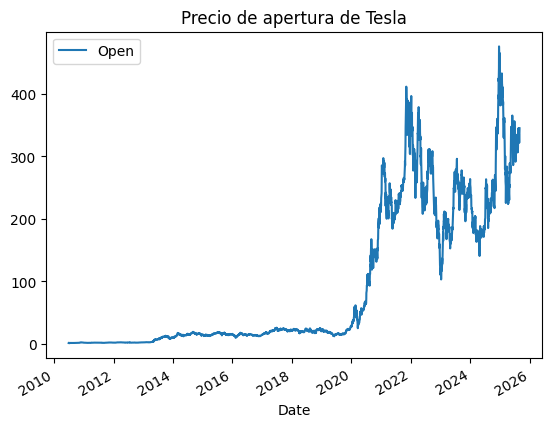

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.plot(x="Date", y="Open", title="Precio de apertura de Tesla")

plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Pista</summary>

```

Solo necesitas invocar la función make_graph con el parámetro requerido para imprimir los gráficos. La estructura para llamar a la función `make_graph` es `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


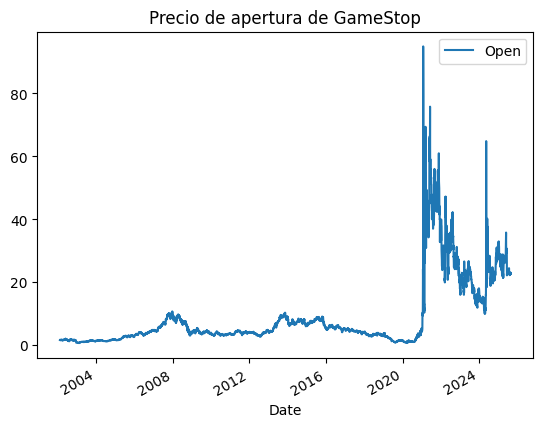

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.plot(x="Date", y="Open", title="Precio de apertura de GameStop")

plt.show()


<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
